Q1. What is Boosting in Machine Learning?

Ans-Boosting is an ensemble technique that combines multiple weak learners sequentially to create a strong learner. Each new model focuses on correcting the errors made by the previous ones.

Q2.  How does Boosting differ from Bagging?

Ans-Bagging is like creating a diverse team of experts, each with their own perspective, and combining their individual opinions to get a more robust overall opinion.
Boosting is like having a team of experts who learn from each other's mistakes, with each new expert focusing on areas where the previous experts struggled.

Q3.  What is the key idea behind AdaBoost?

Ans-AdaBoost adjusts the weights of training examples so that misclassified ones receive more focus in the next iteration. The final model is a weighted sum of all weak learners.

Q4.  Explain the working of AdaBoost with an example

Ans- Start with equal weights on all samples.
Train a weak learner (like a shallow decision tree).
Increase weights for misclassified samples.
Train next learner on the updated weights.
Repeat, then combine all learners’ outputs using a weighted vote.


Q5. What is Gradient Boosting, and how is it different from AdaBoost?

Ans-Gradient Boosting builds models to correct residual errors using gradient descent.
AdaBoost modifies weights; Gradient Boosting minimizes a loss function.
Gradient Boosting can use any differentiable loss function, not just classification errors.


Q6. What is the loss function in Gradient Boosting?

Ans-It depends on the task:

Regression: Mean Squared Error (MSE), MAE

Classification: Log Loss (Binary Cross-Entropy)

Q7. How does XGBoost improve over traditional Gradient Boosting?

Ans- Regularization to prevent overfitting

Parallel processing

Tree pruning

Handling missing values

Sparse-aware algorithms

Faster training with cache optimization

Q8. What is the difference between XGBoost and CatBoost?

Ans-XGBoost requires pre-processing for categorical variables, while CatBoost natively handles them without extra steps.

Q9. What are some real-world applications of Boosting techniques?

Ans-Fraud detection

Customer churn prediction

Medical diagnosis

Search ranking (e.g., Bing uses XGBoost)

Financial modeling and forecasting

Q10.How does regularization help in XGBoost?

Ans-Regularization terms (L1 & L2) prevent overfitting by penalizing overly complex trees. This keeps the model simpler and more generalizable.

Q11.  What are some hyperparameters to tune in Gradient Boosting models?

Ans- n_estimators, learning_rate, max_depth, subsample, min_samples_split,min_samples_leaf, loss function.

Q12.  What is the concept of Feature Importance in Boosting?

Ans-Feature importance shows how useful each feature was in constructing the boosted trees, based on metrics like:
Frequency of splits, Gain in information,Cover (number of observations impacted)

Q13. Why is CatBoost efficient for categorical data?

Ans-CatBoost uses a technique called ordered boosting and target statistics to natively handle categorical features without needing explicit encoding (like one-hot or label encoding).









In [1]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


In [5]:
#14 Train an AdaBoost Classifier on a sample dataset and print model accuracy.

# Step-by-step training of AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ AdaBoost Classifier Accuracy:", accuracy)



✅ AdaBoost Classifier Accuracy: 0.9649122807017544


In [6]:
#14 Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate with Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("AdaBoost Regressor Mean Absolute Error:", mae)


AdaBoost Regressor Mean Absolute Error: 45.542157628782135


mean radius: 0.0009
mean texture: 0.0179
mean perimeter: 0.0005
mean area: 0.0001
mean smoothness: 0.0002
mean compactness: 0.0028
mean concavity: 0.0000
mean concave points: 0.4746
mean symmetry: 0.0004
mean fractal dimension: 0.0002
radius error: 0.0071
texture error: 0.0065
perimeter error: 0.0006
area error: 0.0089
smoothness error: 0.0014
compactness error: 0.0019
concavity error: 0.0129
concave points error: 0.0093
symmetry error: 0.0015
fractal dimension error: 0.0017
worst radius: 0.0685
worst texture: 0.0516
worst perimeter: 0.0274
worst area: 0.0441
worst smoothness: 0.0041
worst compactness: 0.0007
worst concavity: 0.0165
worst concave points: 0.2367
worst symmetry: 0.0011
worst fractal dimension: 0.0000


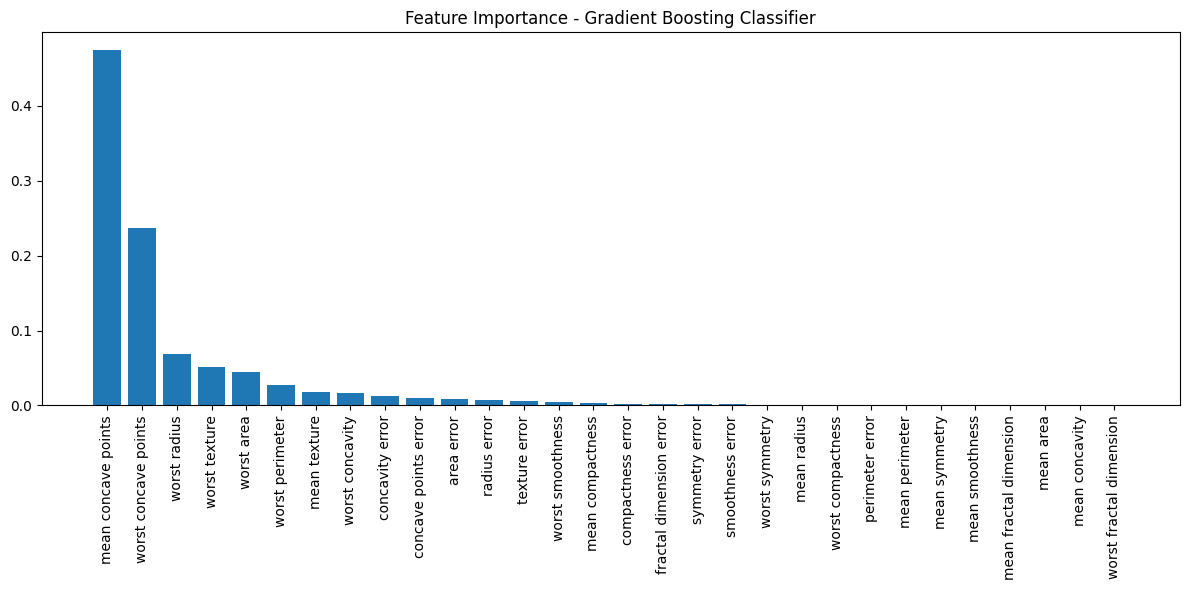

In [7]:
#16 Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train model
gb_clf.fit(X_train, y_train)

# Feature importance
importances = gb_clf.feature_importances_
features = load_breast_cancer().feature_names

# Print feature importance
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importance - Gradient Boosting Classifier")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



In [8]:
#17  Train a Gradient Boosting Regressor and evaluate using R-Squared Score.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train model
gb_reg.fit(X_train, y_train)

# Predict
y_pred = gb_reg.predict(X_test)

# Evaluate with R-squared score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R-squared score:", r2)


Gradient Boosting Regressor R-squared score: 0.42411118357958855


In [9]:
#18 Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_preds = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)

# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")
print(f"XGBoost Classifier Accuracy: {xgb_accuracy:.4f}")



Gradient Boosting Classifier Accuracy: 0.9580
XGBoost Classifier Accuracy: 0.9580


In [10]:
#19  Train a CatBoost Classifier and evaluate using F1-Score.
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)

# Train model
cat_clf.fit(X_train, y_train)

# Predict
y_pred = cat_clf.predict(X_test)

# Evaluate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1:.4f}")



CatBoost Classifier F1-Score: 0.9832


In [11]:
#20 Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_diabetes(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Train model
xgb_reg.fit(X_train, y_train)

# Predict
y_pred = xgb_reg.predict(X_test)

# Evaluate using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor Mean Squared Error: {mse:.4f}")



XGBoost Regressor Mean Squared Error: 3365.3298


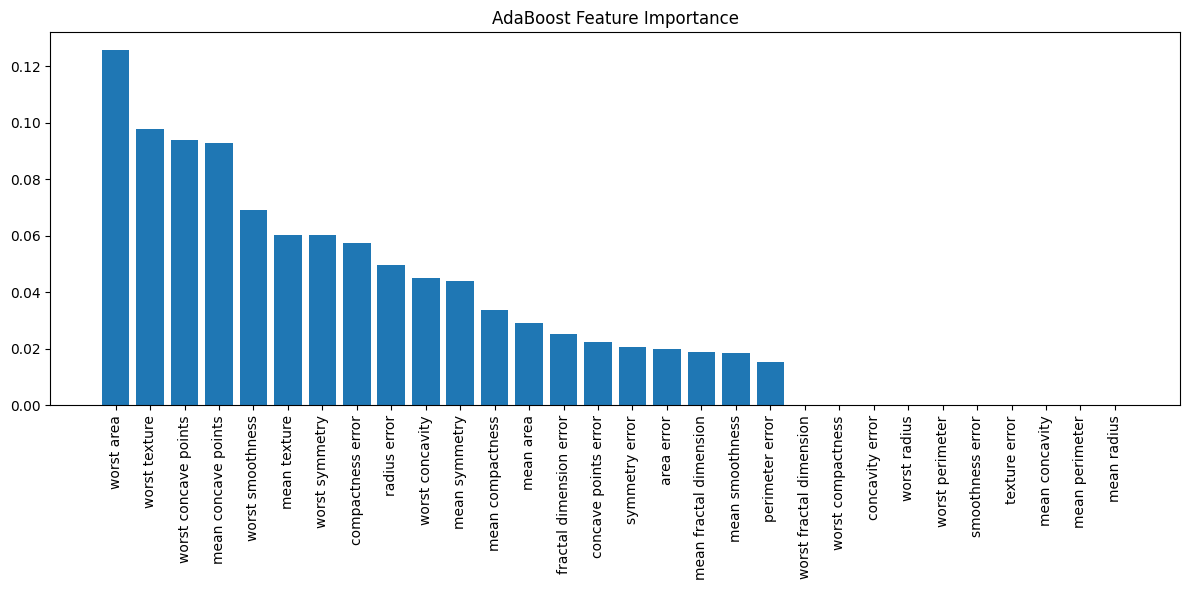

In [12]:
#21  Train an AdaBoost Classifier and visualize feature importance.
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Get feature importances
importances = ada_clf.feature_importances_
features = load_breast_cancer().feature_names

# Plot feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("AdaBoost Feature Importance")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



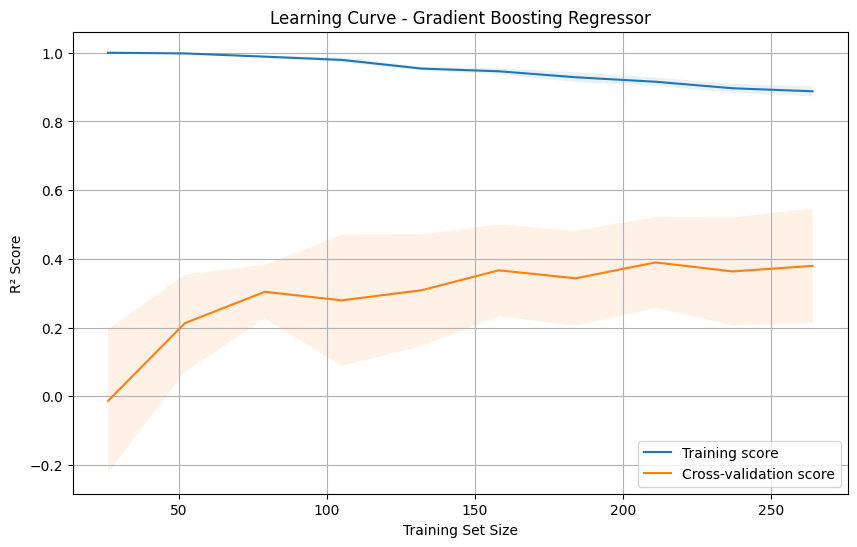

In [13]:
#22 Train a Gradient Boosting Regressor and plot learning curves.
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
import numpy as np

# Load dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    gb_reg, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Learning Curve - Gradient Boosting Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()


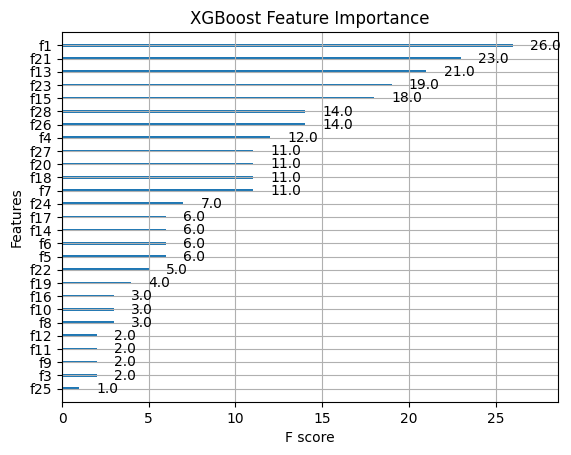

In [14]:
#23 Train an XGBoost Classifier and visualize feature importance.
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(xgb_clf)
plt.title('XGBoost Feature Importance')
plt.show()


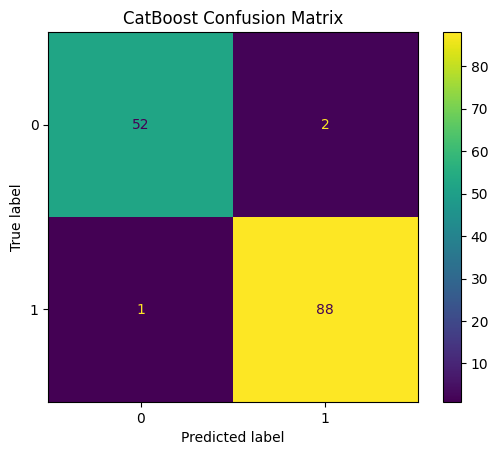

In [15]:
#24 Train a CatBoost Classifier and plot the confusion matrix.
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)

# Predict
y_pred = cat_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("CatBoost Confusion Matrix")
plt.show()


Estimators: 10 - Accuracy: 0.9720
Estimators: 50 - Accuracy: 0.9580
Estimators: 100 - Accuracy: 0.9790
Estimators: 200 - Accuracy: 0.9790


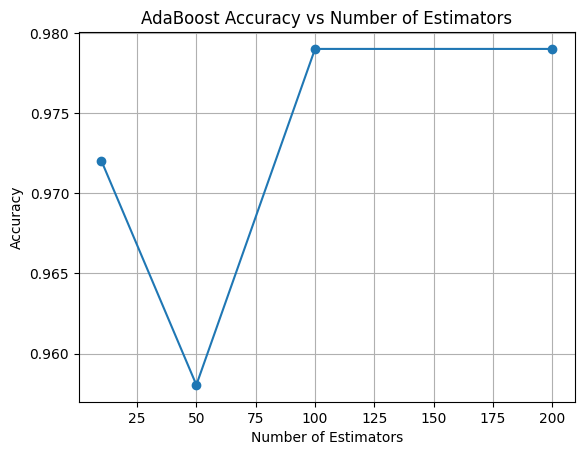

In [16]:
#25  Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

estimators = [10, 50, 100, 200]
accuracies = []

for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"Estimators: {n} - Accuracy: {acc:.4f}")

# Plot
plt.plot(estimators, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


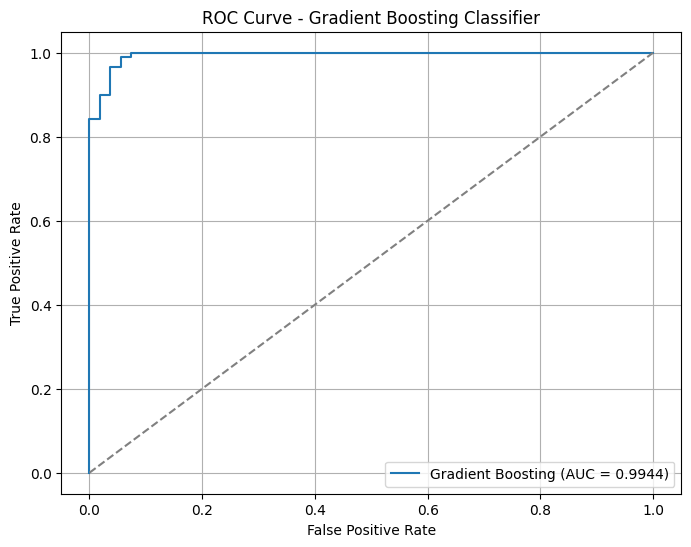

In [17]:
#26  Train a Gradient Boosting Classifier and visualize the ROC curve.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_probs = gb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [18]:
#27 Train an XGBoost Regressor and tune the learning rate using GridSearchCV.
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Set up GridSearchCV to tune learning_rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best learning rate:", grid_search.best_params_)

# Evaluate best estimator on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE with best learning rate: {mse:.4f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best learning rate: {'learning_rate': 0.05}
Test MSE with best learning rate: 3409.9506


In [19]:
#28 Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train CatBoost without class weights
model_no_weights = CatBoostClassifier(verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
preds_no_weights = model_no_weights.predict(X_test)

print("Classification report without class weights:")
print(classification_report(y_test, preds_no_weights))

# Calculate class weights manually
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train CatBoost with class weights
model_with_weights = CatBoostClassifier(class_weights=class_weights_dict, verbose=0, random_state=42)
model_with_weights.fit(X_train, y_train)
preds_with_weights = model_with_weights.predict(X_test)

print("Classification report with class weights:")
print(classification_report(y_test, preds_with_weights))


Classification report without class weights:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       226
           1       1.00      0.58      0.74        24

    accuracy                           0.96       250
   macro avg       0.98      0.79      0.86       250
weighted avg       0.96      0.96      0.96       250

Classification report with class weights:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       226
           1       0.71      0.71      0.71        24

    accuracy                           0.94       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.94      0.94      0.94       250



Learning Rate: 0.01 - Accuracy: 0.9441
Learning Rate: 0.1 - Accuracy: 0.9650
Learning Rate: 0.5 - Accuracy: 0.9580
Learning Rate: 1.0 - Accuracy: 0.9580


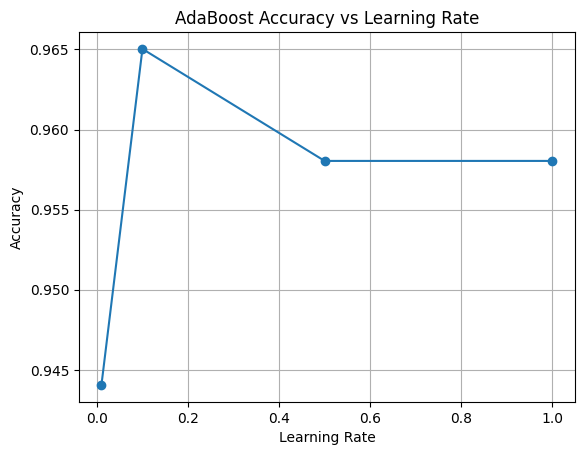

In [20]:
#29  Train an AdaBoost Classifier and analyze the effect of different learning rates.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

learning_rates = [0.01, 0.1, 0.5, 1.0]
accuracies = []

for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"Learning Rate: {lr} - Accuracy: {acc:.4f}")

# Plot
plt.plot(learning_rates, accuracies, marker='o')
plt.title("AdaBoost Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [21]:
#30 Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load Iris dataset (multi-class)
X, y = load_iris(return_X_y=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize XGBoost Classifier for multi-class
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',  # for multi-class probability output
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Train model
xgb_clf.fit(X_train, y_train)

# Predict probabilities
y_probs = xgb_clf.predict_proba(X_test)

# Evaluate using log-loss
loss = log_loss(y_test, y_probs)
print(f"XGBoost Multi-class Log-Loss: {loss:.4f}")


XGBoost Multi-class Log-Loss: 0.0093
